In [113]:
import pandas as pd
import numpy as np
import os

import time

import matplotlib.pyplot as plt

In [2]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [3]:
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [5]:
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


In [6]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [7]:
year_data.info()
year_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [8]:
print ("Year data shape: ", year_data.shape)
print("Number of unique items in year_df: ", year_data['item'].nunique())
print("Number of unique years: ", year_data['year'].nunique())
print ("\nStatistics of year data: ")
year_data['year'].describe()

Year data shape:  (6799, 2)
Number of unique items in year_df:  6799
Number of unique years:  93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

In [9]:
writer_data.info()
writer_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005


In [10]:
title_data.info()
title_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [11]:
genre_data.info()
genre_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [12]:
director_data.info()
director_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [13]:
active_user_ids = train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

print ("active user ids: ", active_user_ids)
print ("\npopular movie ids: ", popular_movie_ids)

active user ids:  Int64Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122,
            118754],
           dtype='int64', name='user')

popular movie ids:  Int64Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


## User & director

In [83]:
director_df = pd.merge(train_df, director_data, on=['item'], how='left')

In [85]:
director_df.isna().sum()

user             0
item             0
time             0
director    301445
dtype: int64

In [86]:
director_df[director_df['director'].isnull()]

,user,item,time,director
11,11,1591,1230782724,NaN
58,11,2793,1230784958,NaN
59,11,33085,1230785024,NaN
72,11,31184,1230785400,NaN
73,11,34338,1230785494,NaN
...,...,...,...,...
5708895,138493,8604,1257785495,NaN
5708929,138493,50601,1258390414,NaN
5708930,138493,224,1258390437,NaN
5708937,138493,61160,1258390537,NaN


In [88]:
len(director_df[director_df['director'].isnull()]) / len(train_df)
# 전체 train_df 대비 5.8퍼센트 정도 결측치 존재

0.058482238041498345

In [90]:
director_df[director_df['director'].isnull()]['item'].nunique() / train_df['item'].nunique()
# item만 놓고 봤을 땐 20퍼센트정도..
# train_df의 item에 대한 side-information이 존재하지 않는 것

0.19156750403995887

## User & writer

In [93]:
writer_df = pd.merge(train_df, writer_data, on=['item'], how='left')

In [94]:
writer_df[writer_df['writer'].isnull()]

,user,item,time,writer
4,11,170,1230782534,NaN
58,11,5151,1230783478,NaN
61,11,33585,1230783564,NaN
120,11,1225,1230784460,NaN
122,11,59418,1230784666,NaN
...,...,...,...,...
11591191,138493,8905,1255856919,NaN
11591192,138493,52579,1255856957,NaN
11591475,138493,1429,1256854805,NaN
11591494,138493,1298,1258134713,NaN


In [95]:
len(writer_df[writer_df['writer'].isnull()]) / len(train_df)
# writer의 경우 6퍼센트 정도..

0.060664227231077644

In [98]:
writer_df[writer_df['writer'].isnull()]['item'].nunique() / train_df['item'].nunique()
# 아이템 각각 놓고 봤을 땐 17퍼센트 정도 결측치가 존재

0.17026590274717202

## User & title

In [99]:
title_df = pd.merge(train_df, title_data, on=['item'], how='left')

In [102]:
title_df[title_df['title'].isnull()]
# title의 경우 전부 다있음

,user,item,time,title


In [103]:
title_df[title_df['title'].isnull()]['item'].nunique() / train_df['item'].nunique()

0.0

## User & year

In [104]:
year_df = pd.merge(train_df, year_data, on=['item'], how='left')

In [105]:
year_df[year_df['year'].isnull()]

,user,item,time,year
3486,132,6987,1114010962,NaN
13645,413,6987,1128709337,NaN
14766,425,3310,1418071653,NaN
15678,448,6987,1128537722,NaN
19598,563,6987,1171575158,NaN
...,...,...,...,...
5147569,138325,8511,1268938902,NaN
5147629,138325,7065,1279124995,NaN
5150507,138406,3310,1139933369,NaN
5150755,138406,32898,1372717892,NaN


In [107]:
len(year_df[year_df['year'].isnull()]) / len(train_df)
# year의 경우 매우 소수만 결측치

0.00035541959591973646

In [108]:
year_df[year_df['year'].isnull()]['item'].nunique()

8

In [106]:
year_df[year_df['year'].isnull()]['item'].nunique() / train_df['item'].nunique()

0.0011752607609813426

## User & genre

In [109]:
genre_df = pd.merge(train_df, genre_data, on=['item'], how='left')

In [111]:
genre_df[genre_df['genre'].isnull()]
# genre의 경우 결측치 없음!

,user,item,time,genre


## inner join vs left join 비교

In [137]:
# inner vs left 비교
inner_train_df = train_df.copy()
left_train_df = train_df.copy()

In [138]:
left_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [139]:
# inner join의 경우
inner_train_df = pd.merge(inner_train_df, genre_data.drop_duplicates(subset=['item']), on=['item'])
inner_train_df = pd.merge(inner_train_df, director_data.drop_duplicates(subset=['item']), on=['item'])
inner_train_df = pd.merge(inner_train_df, title_data.drop_duplicates(subset=['item']), on=['item'])
inner_train_df = pd.merge(inner_train_df, writer_data.drop_duplicates(subset=['item']), on=['item'])
inner_train_df = pd.merge(inner_train_df, year_data.drop_duplicates(subset=['item']), on=['item'])

In [140]:
inner_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658299 entries, 0 to 4658298
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user      int64 
 1   item      int64 
 2   time      int64 
 3   genre     object
 4   director  object
 5   title     object
 6   writer    object
 7   year      int64 
dtypes: int64(4), object(4)
memory usage: 319.9+ MB


In [141]:
left_train_df = pd.merge(left_train_df, genre_data.drop_duplicates(subset=['item']), on=['item'], how='left')
left_train_df = pd.merge(left_train_df, director_data.drop_duplicates(subset=['item']), on=['item'], how='left')
left_train_df = pd.merge(left_train_df, title_data.drop_duplicates(subset=['item']), on=['item'], how='left')
left_train_df = pd.merge(left_train_df, writer_data.drop_duplicates(subset=['item']), on=['item'], how='left')
left_train_df = pd.merge(left_train_df, year_data.drop_duplicates(subset=['item']), on=['item'], how='left')

In [142]:
left_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5154471 entries, 0 to 5154470
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      int64  
 1   item      int64  
 2   time      int64  
 3   genre     object 
 4   director  object 
 5   title     object 
 6   writer    object 
 7   year      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 353.9+ MB


5154471 - > 4658299 로 감소

미션 EDA의 경우 inner join을 해줬음 -> 아마 시각화때문에?

inner join의 경우 데이터 일부가 사라짐 -> left로 가자

In [ ]:
# !pip install missingno

In [ ]:
# missingno
import missingno as msno

<Axes: >

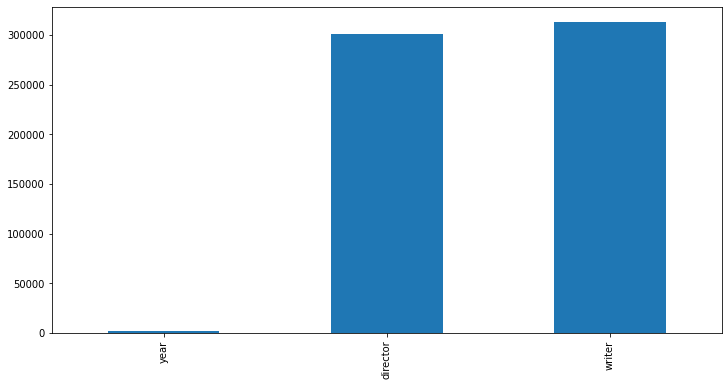

In [146]:
missing = left_train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

<Axes: >

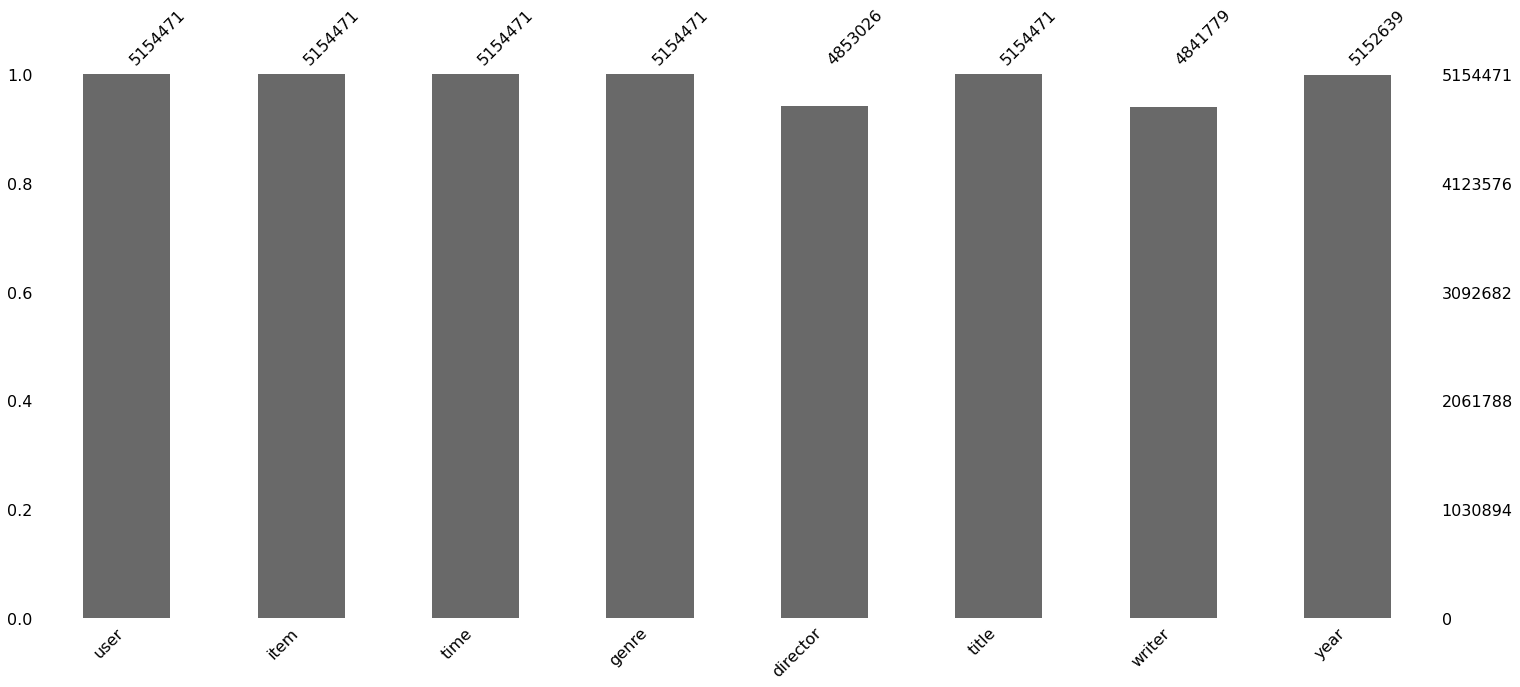

In [145]:
msno.bar(left_train_df)

director, writer, year에서 결측치가 있음을 missingno packgage로 확인

일단 LightGCN에서는 user, item만을 가지고 connect를 형성하기 때문에 side-information이 필요할 경우 다시 돌아와서 결측치 처리에 대해 고민해보자

## User

In [152]:
active_user_ids

Int64Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122,
            118754],
           dtype='int64', name='user')

/tmp/ipykernel_33433/2370076040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)


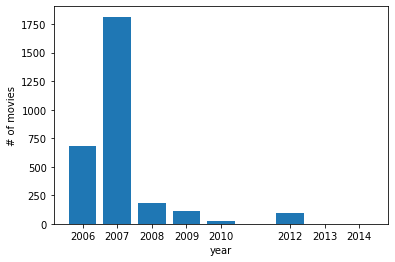

In [153]:
specific_user_df = train_df[train_df['user'] == active_user_ids[0]]
specific_user_df[['item']].nunique()
specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)

plt.bar(specific_user_df['year'].value_counts().index, specific_user_df['year'].value_counts().values)
plt.xticks(specific_user_df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

/tmp/ipykernel_33433/2609392348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)


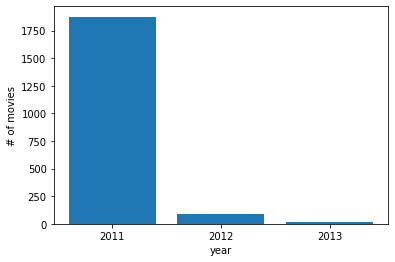

In [154]:
specific_user_df = train_df[train_df['user'] == active_user_ids[1]]
specific_user_df[['item']].nunique()
specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)

plt.bar(specific_user_df['year'].value_counts().index, specific_user_df['year'].value_counts().values)
plt.xticks(specific_user_df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

/tmp/ipykernel_33433/1953889599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)


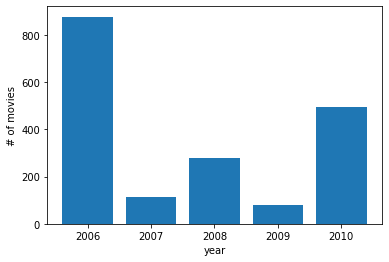

In [155]:
specific_user_df = train_df[train_df['user'] == active_user_ids[2]]
specific_user_df[['item']].nunique()
specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)

plt.bar(specific_user_df['year'].value_counts().index, specific_user_df['year'].value_counts().values)
plt.xticks(specific_user_df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

/tmp/ipykernel_33433/1661178960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)


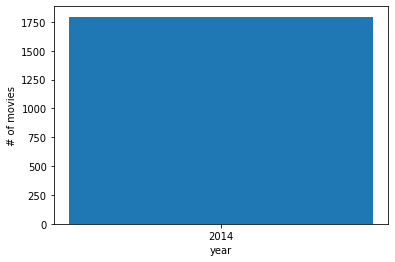

In [156]:
specific_user_df = train_df[train_df['user'] == active_user_ids[4]]
specific_user_df[['item']].nunique()
specific_user_df['year'] = specific_user_df['time'].apply(lambda x:time.localtime(x).tm_year)

plt.bar(specific_user_df['year'].value_counts().index, specific_user_df['year'].value_counts().values)
plt.xticks(specific_user_df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

interaction이 많은 상위 4명 유저를 봤을 때 딱히 연도와의 관련성을 찾을 수 없음

뒤에서 보겠지만 2000년도 중반에 interaction이 제일 많았고 2010년대에는 상대적으로 작음 

하지만 상위 유저들은 특정 년도에 분포되어 있지는 않음

## Time: 사용자가 영화와 interact 한 시간

In [27]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


/tmp/ipykernel_33433/3998196915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


Text(0.5, 1.0, 'Statistics of user activity')

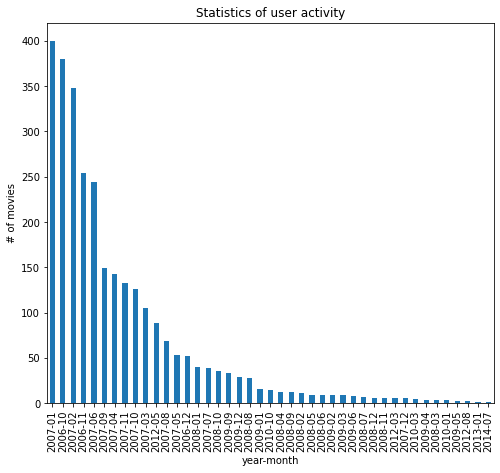

In [28]:
old_df = train_df[train_df['user'] == active_user_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year-month')
plt.ylabel('# of movies')
plt.title('Statistics of user activity')

In [32]:
time_df = train_df[['time']]
time_df['year'] = time_df['time'].apply(lambda x:time.localtime(x).tm_year)
# localtime method 중 tm_year, tm_mon, tm_mday, tm_hour 등 존재

/tmp/ipykernel_33433/3685318111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['year'] = time_df['time'].apply(lambda x:time.localtime(x).tm_year)


In [ ]:
time_df['year'].value_counts()

Text(0, 0.5, '# of movies')

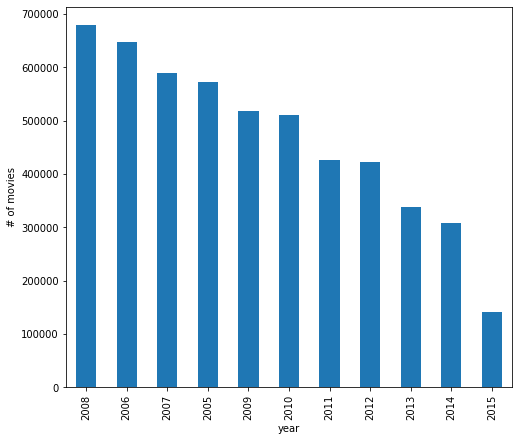

In [39]:
time_df['year'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year')
plt.ylabel('# of movies')

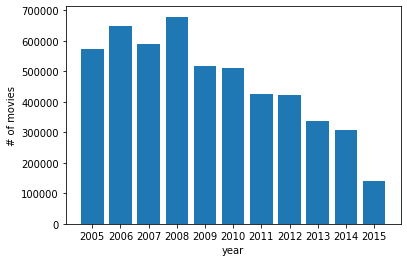

In [45]:
plt.bar(time_df['year'].value_counts().index, time_df['year'].value_counts().values)
plt.xticks(time_df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('# of movies')
plt.show()

year: 2008년 데이터가 제일 많고 2009년이후 감소하는 추세

In [47]:
time_df['month'] = time_df['time'].apply(lambda x:time.localtime(x).tm_mon)

Text(0, 0.5, '# of movies')

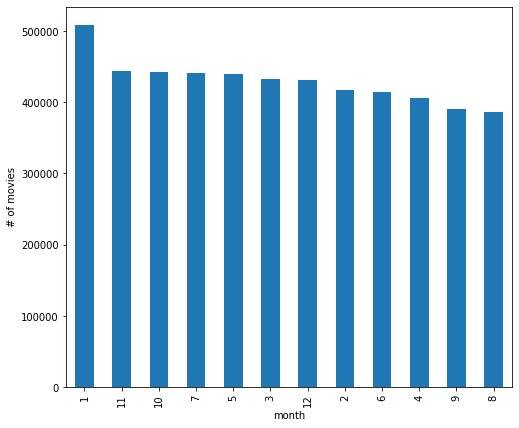

In [48]:
time_df['month'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('month')
plt.ylabel('# of movies')

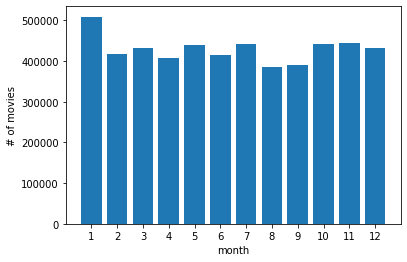

In [49]:
plt.bar(time_df['month'].value_counts().index, time_df['month'].value_counts().values)
plt.xticks(time_df['month'].value_counts().index)
plt.xlabel('month')
plt.ylabel('# of movies')
plt.show()

month: 1월이 제일 많고 8월이 제일 적음 나머지는 비슷

In [50]:
time_df['day'] = time_df['time'].apply(lambda x:time.localtime(x).tm_mday)
# tm_mday: 1~31일 

Text(0, 0.5, '# of movies')

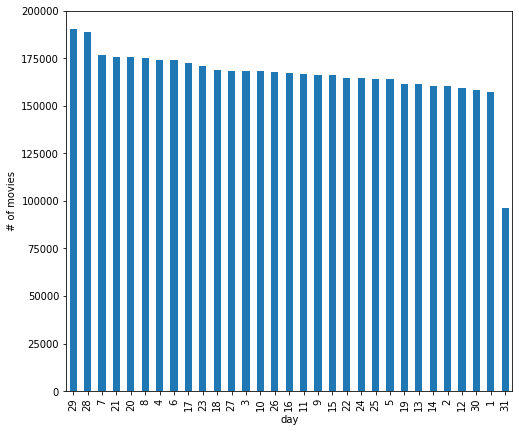

In [51]:
time_df['day'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('day')
plt.ylabel('# of movies')

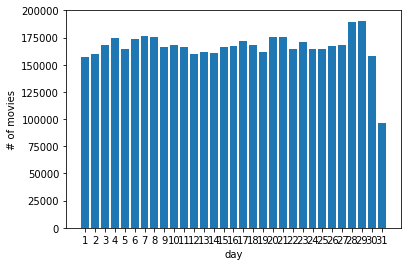

In [52]:
plt.bar(time_df['day'].value_counts().index, time_df['day'].value_counts().values)
plt.xticks(time_df['day'].value_counts().index)
plt.xlabel('day')
plt.ylabel('# of movies')
plt.show()

day: 29일이 제일 많다. 31일은 제일 적음(당연)

In [53]:
time_df['hour'] = time_df['time'].apply(lambda x:time.localtime(x).tm_hour)

Text(0, 0.5, '# of movies')

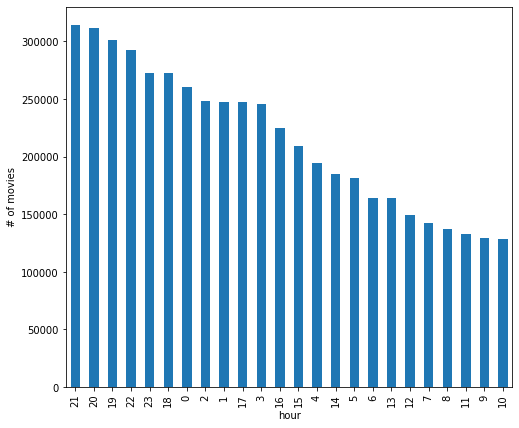

In [54]:
time_df['hour'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('hour')
plt.ylabel('# of movies')

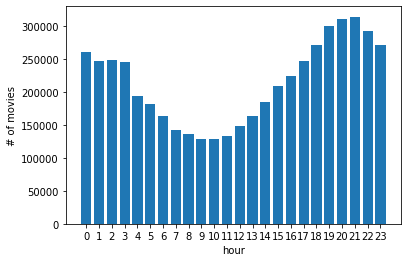

In [55]:
plt.bar(time_df['hour'].value_counts().index, time_df['hour'].value_counts().values)
plt.xticks(time_df['hour'].value_counts().index)
plt.xlabel('hour')
plt.ylabel('# of movies')
plt.show()

hour: 21시가 제일 많고 오후~새벽대에 몰려있음